In [185]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta
sns.set()

In [186]:
def exp_func(x, a, b):
    return b*(x**a)

In [187]:
x=np.linspace(1,36,36)
data=exp_func(x, -0.5, 100000)

In [188]:
df=pd.DataFrame({'x':x,'y':data})
df=df.astype(int)
display(df.head())

,x,y
0,1,100000
1,2,70710
2,3,57735
3,4,50000
4,5,44721


In [189]:
init_mon=dt.datetime(2017,df['x'].values[0],1)
months=[init_mon]
for mon in range(1,len(df)):
    months.append(init_mon + relativedelta(months=mon))
df['month']=months
df.index=months
display(df.head())

,x,y,month
2017-01-01,1,100000,2017-01-01
2017-02-01,2,70710,2017-02-01
2017-03-01,3,57735,2017-03-01
2017-04-01,4,50000,2017-04-01
2017-05-01,5,44721,2017-05-01


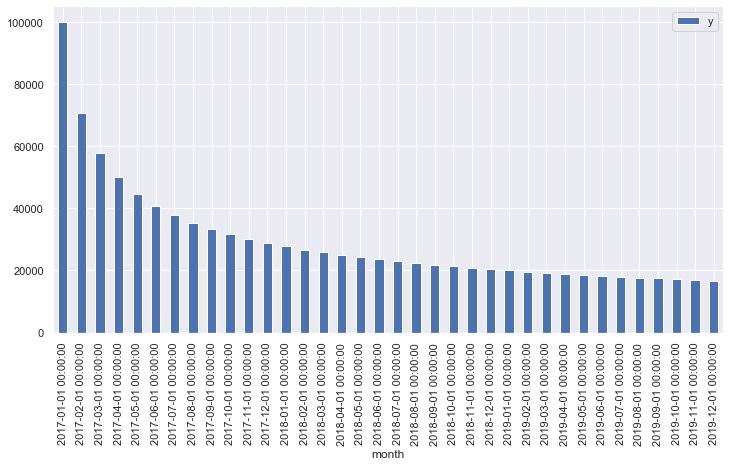

In [190]:
fig=plt.figure(figsize=(12,6))
ax=plt.subplot(1,1,1)

df.plot.bar('month','y',ax=ax)
plt.show()

In [201]:
df2=df.copy()
df2.loc[(df2.index.month==1)&(df2.index.year>=2018), 'y']=df2['y']*1.6
df2.loc[(df2.index.month==2)&(df2.index.year>=2018), 'y']=df2['y']*1.4
df2.loc[(df2.index.month==3)&(df2.index.year>=2018), 'y']=df2['y']*1.2
display(df2.head())

,x,y,month
2017-01-01,1,100000.0,2017-01-01
2017-02-01,2,70710.0,2017-02-01
2017-03-01,3,57735.0,2017-03-01
2017-04-01,4,50000.0,2017-04-01
2017-05-01,5,44721.0,2017-05-01


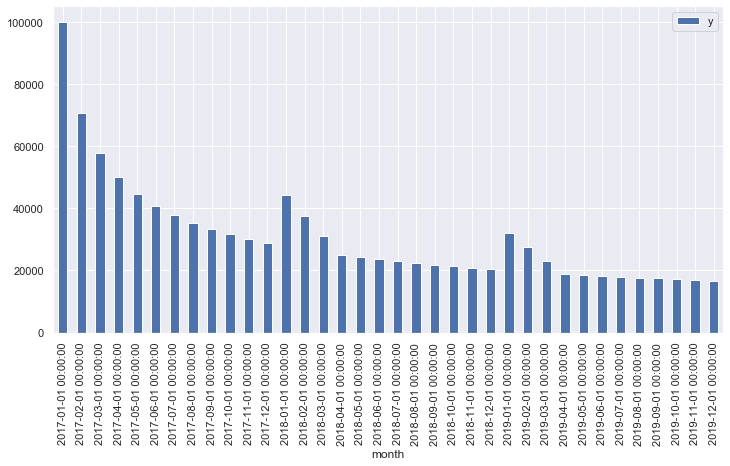

In [202]:
fig=plt.figure(figsize=(12,6))
ax=plt.subplot(1,1,1)

df2.plot.bar('month','y',ax=ax)
plt.show()

In [203]:
def sma(roll_list):
    
    roll_list=roll_list[~np.isnan(roll_list)]
    sorted_roll_list=sorted(roll_list)
    harf_span=round(len(sorted_roll_list)/2)
    if harf_span > 0:
        harf_index=np.where(roll_list < sorted_roll_list[harf_span])
        roll_list_harf=roll_list[harf_index]
        sma = np.sum(roll_list_harf) / len(roll_list_harf)
    else:
        roll_list_harf=roll_list[0]
        sma = roll_list_harf
    
    return sma

In [204]:
def wma(roll_list):
    
    roll_list=roll_list[~np.isnan(roll_list)]
    sorted_roll_list=sorted(roll_list)
    harf_span=round(len(sorted_roll_list)/2)
    harf_index=np.where(roll_list < sorted_roll_list[harf_span])
    roll_list_harf=roll_list[harf_index]
    weight = np.arange(len(roll_list_harf)) + 1
    wma = np.sum(weight * roll_list_harf) / weight.sum()
    
    return wma

In [206]:
# shift
df2['y_shift'] = df2['y'].shift(3)

# SMA
df2['y_sma'] = df2['y_shift'].rolling(6,min_periods=1).apply(sma, raw = True)

# WMA
df2['y_wma'] = df2['y_shift'].rolling(6,min_periods=1).apply(wma, raw = True)

# WMAの計算ができないNULLをSMA値にする
df2.loc[pd.isna(df2['y_wma']), 'y_wma']\
= df2['y_sma']

display(df2.head(10))

,x,y,month,y_shift,y_sma,y_wma
2017-01-01,1,100000.0,2017-01-01,NaN,NaN,NaN
2017-02-01,2,70710.0,2017-02-01,NaN,NaN,NaN
2017-03-01,3,57735.0,2017-03-01,NaN,NaN,NaN
2017-04-01,4,50000.0,2017-04-01,100000.0,100000.000000,100000.000000
2017-05-01,5,44721.0,2017-05-01,70710.0,70710.000000,70710.000000
2017-06-01,6,40824.0,2017-06-01,57735.0,64222.500000,62060.000000
2017-07-01,7,37796.0,2017-07-01,50000.0,53867.500000,52578.333333
2017-08-01,8,35355.0,2017-08-01,44721.0,47360.500000,46480.666667
2017-09-01,9,33333.0,2017-09-01,40824.0,45181.666667,43652.333333
2017-10-01,10,31622.0,2017-10-01,37796.0,41113.666667,39959.500000


In [207]:
df2

,x,y,month,y_shift,y_sma,y_wma
2017-01-01,1,100000.0,2017-01-01,NaN,NaN,NaN
2017-02-01,2,70710.0,2017-02-01,NaN,NaN,NaN
2017-03-01,3,57735.0,2017-03-01,NaN,NaN,NaN
2017-04-01,4,50000.0,2017-04-01,100000.0,100000.000000,100000.000000
2017-05-01,5,44721.0,2017-05-01,70710.0,70710.000000,70710.000000
2017-06-01,6,40824.0,2017-06-01,57735.0,64222.500000,62060.000000
2017-07-01,7,37796.0,2017-07-01,50000.0,53867.500000,52578.333333
2017-08-01,8,35355.0,2017-08-01,44721.0,47360.500000,46480.666667
2017-09-01,9,33333.0,2017-09-01,40824.0,45181.666667,43652.333333
2017-10-01,10,31622.0,2017-10-01,37796.0,41113.666667,39959.500000


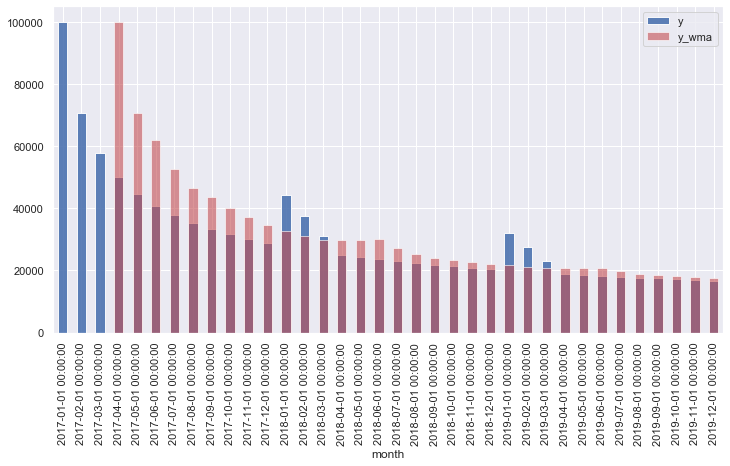

In [196]:
fig=plt.figure(figsize=(12,6))
ax=plt.subplot(1,1,1)

df2.plot.bar('month','y',ax=ax,color='b',alpha=0.9)
df2.plot.bar('month','y_wma',ax=ax,color='r',alpha=0.6)
plt.show()